# Part 1: Machine Learning Models

You work for an office transport company. You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to predict the preferred mode of transport. The project requires you to build several Machine Learning models and compare them so that the model can be finalised.


| Column name| Description|
|--:|:--|
|Age | Age of the Employee in Years |
|Gender | Gender of the Employee |
|Engineer | For Engineer =1 , Non Engineer =0 |
|MBA| For MBA =1 , Non MBA =0 |
|Work Exp | Experience in years |
|Salary | Salary in Lakhs per Annum |
|Distance | Distance in Kms from Home to Office |
|license | If Employee has Driving Licence -1, If not, then 0 |
|Transport | Mode of Transport|

**Table 1.1: Data Dictionary** 

#### Question 1.1
Basic data summary, Univariate, Bivariate analysis, graphs, checking correlations, outliers and missing values treatment (if necessary) and check the basic descriptive statistics of the dataset.

In [1]:
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")


In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
cars = pd.read_csv("Cars.csv")

In [5]:
cars


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport
...,...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport


|  | Age | Gender | Engineer | MBA | Work Exp | Salary | Distance | license | Transport |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 28 | Male | 0 | 0 | 4 | 14.3 | 3.2 | 0 | Public Transport |
| 1 | 23 | Female | 1 | 0 | 4 | 8.3 | 3.3 | 0 | Public Transport |
| 2 | 29 | Male | 1 | 0 | 7 | 13.4 | 4.1 | 0 | Public Transport |
| 3 | 28 | Female | 1 | 1 | 5 | 13.4 | 4.5 | 0 | Public Transport |
| 4 | 27 | Male | 1 | 0 | 4 | 13.4 | 4.6 | 0 | Public Transport |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 439 | 40 | Male | 1 | 0 | 20 | 57.0 | 21.4 | 1 | Private Transport |
| 440 | 38 | Male | 1 | 0 | 19 | 44.0 | 21.5 | 1 | Private Transport |
| 441 | 37 | Male | 1 | 0 | 19 | 45.0 | 21.5 | 1 | Private Transport |
| 442 | 37 | Male | 0 | 0 | 19 | 47.0 | 22.8 | 1 | Private Transport |
| 443 | 39 | Male | 1 | 1 | 21 | 50.0 | 23.4 | 1 | Private Transport |

**Table 1.2: Cars Dataset**

In [6]:
# Shape of the dataframe
print("no. of rows: ",cars.shape[0], "\n""no. of columns: ",cars.shape[1])

no. of rows:  444 
no. of columns:  9


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [ ]:
# - From the above table we see No missing Values. 

In [8]:
cars.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [ ]:
# - from the above  table we see No Null values present

In [9]:
# Making a different list for Cat columns and Num Columns
cat=[]
num=[]
for i in cars.columns:
    if cars[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Gender', 'Transport']
['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']


In [ ]:
# Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables with values as “?”.

In [10]:
for variable in cat:
    print(variable,":", sum(cars[variable] == '?'))

Gender : 0
Transport : 0


In [ ]:
#The output of the above code snippet shows that there are "?" or " " present in the data set

In [11]:
cars[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [ ]:
#- From the above table we can see that the Average age is 28
#- In the given data set, 75% are Engineers and 25% are MBA graduates
#- Average work experience of 6 years with minimum years of exp being 0 and max years of exp being 24
#- Average Salary earned is 16.23 Lakhs per annum of which 6.5 lakhs per annum being the least and 57 lakhs per annum being the maximum
#-Average Distance travelled form Home to Office is 11.32 KM. Minimum distance covered by an emploee is 3.2 KM and maximum distance covered is 23.4 KM


In [12]:
cars[cat].describe().T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


In [ ]:
#- In the given Dataset Male to female ratio is high. There are 316 Male employees and 128 Female Employees
#- We can also see that 300 employees use Public transport and rest 144 use Private transport.

In [14]:
dups = cars.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

cars[dups]

Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


In [ ]:
#- there are no duplicate Rows present in the given Dataset. 

#### Univariate Analysis

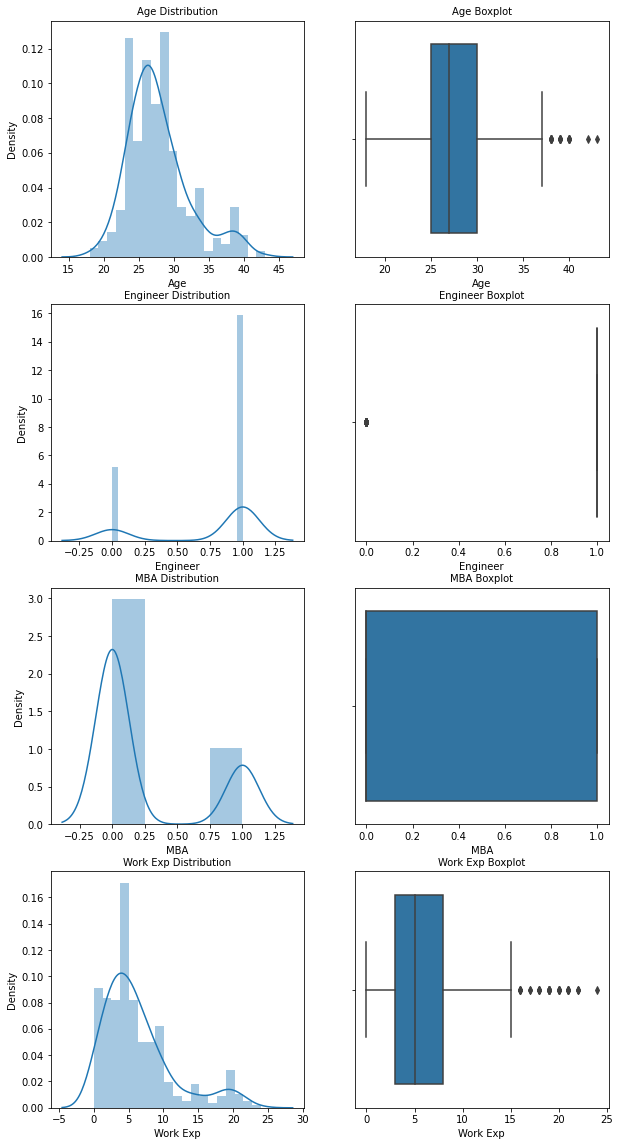

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(cars['Age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(cars['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)


a = sns.distplot(cars['Engineer'] , ax=axes[1][0])
a.set_title("Engineer Distribution",fontsize=10)

a = sns.boxplot(cars['Engineer'] , orient = "v" , ax=axes[1][1])
a.set_title("Engineer Boxplot",fontsize=10)


a = sns.distplot(cars['MBA'] , ax=axes[2][0])
a.set_title("MBA Distribution",fontsize=10)

a = sns.boxplot(cars['MBA'] , orient = "v" , ax=axes[2][1])
a.set_title("MBA Boxplot",fontsize=10)


a = sns.distplot(cars['Work Exp'] , ax=axes[3][0])
a.set_title("Work Exp Distribution",fontsize=10)

a = sns.boxplot(cars['Work Exp'] , orient = "v" , ax=axes[3][1])
a.set_title("Work Exp Boxplot",fontsize=10)


plt.show()

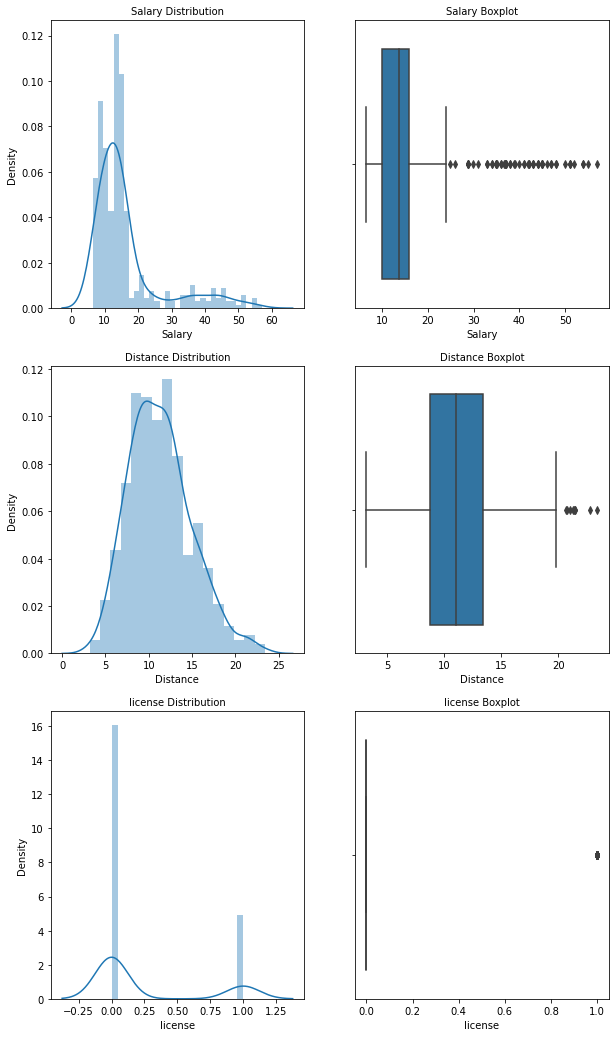

In [17]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(cars['Salary'] , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(cars['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Boxplot",fontsize=10)

a = sns.distplot(cars['Distance'] , ax=axes[1][0])
a.set_title("Distance Distribution",fontsize=10)

a = sns.boxplot(cars['Distance'] , orient = "v" , ax=axes[1][1])
a.set_title("Distance Boxplot",fontsize=10)

a = sns.distplot(cars['license'] , ax=axes[2][0])
a.set_title("license Distribution",fontsize=10)

a = sns.boxplot(cars['license'] , orient = "v" , ax=axes[2][1])
a.set_title("license Boxplot",fontsize=10)
plt.show()

- We see that Age, Work Experience, Salary columns are Right Skewed. Distance travelled has a Normal Distribution.
- All the above 4 columns mentioned have Outliers which will be treated later.

#### Bivariate Analysis

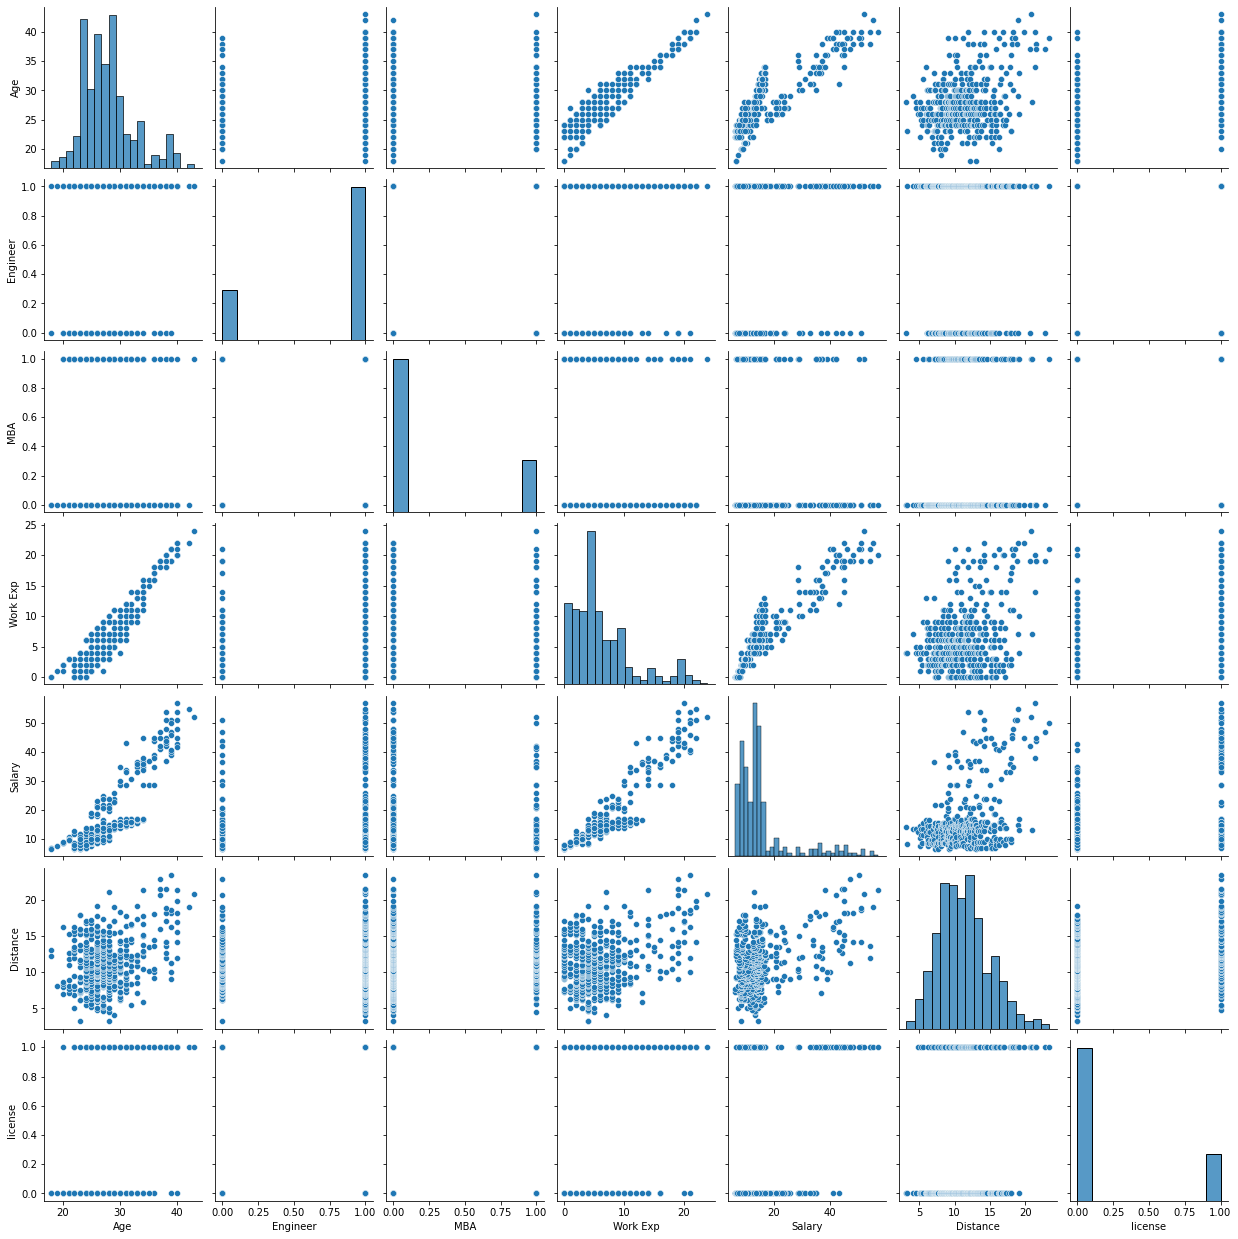

In [20]:
sns.pairplot(data=cars);

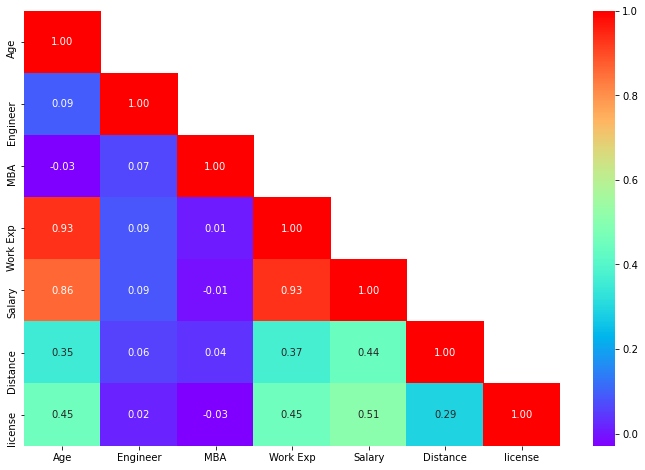

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(cars[num].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(cars[num].corr(),+1))
plt.show()

In [ ]:
#- We can see that Age is highly Correlated ot Work experience and Salary. Salary is also Highly Correlated to Work expreience
#- We see that Engineer column and MBA column have the least correlation with other columns.

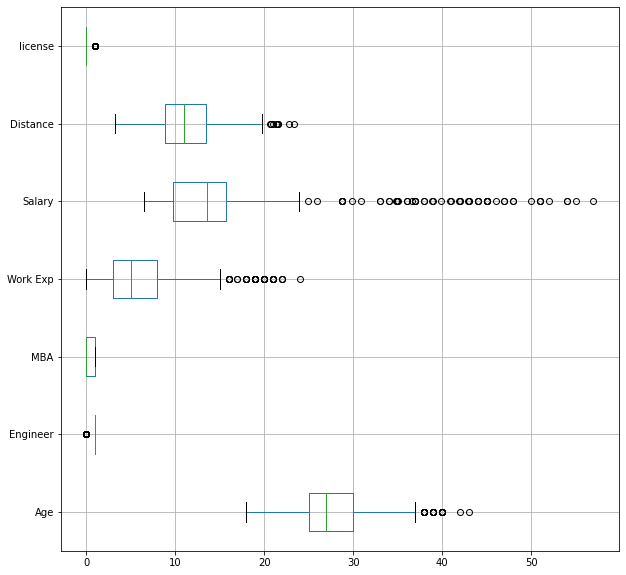

In [23]:
# Outlier Check
plt.figure(figsize=(10,10))
cars[num].boxplot(vert=0)
plt.show()

- We see that Age, Salary , Work Exp & Distance have Outliers present in them.
- In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier .

In [24]:
# Outliers Treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
lr,ur=remove_outlier(cars["Age"])
cars["Age"]=np.where(cars["Age"]>ur,ur,cars["Age"])
cars["Age"]=np.where(cars["Age"]<lr,lr,cars["Age"])

lr,ur=remove_outlier(cars["Salary"])
cars["Salary"]=np.where(cars["Salary"]>ur,ur,cars["Salary"])
cars["Salary"]=np.where(cars["Salary"]<lr,lr,cars["Salary"])

lr,ur=remove_outlier(cars["Work Exp"])
cars["Work Exp"]=np.where(cars["Work Exp"]>ur,ur,cars["Work Exp"])
cars["Work Exp"]=np.where(cars["Work Exp"]<lr,lr,cars["Work Exp"])

lr,ur=remove_outlier(cars["Distance"])
cars["Distance"]=np.where(cars["Distance"]>ur,ur,cars["Distance"])
cars["Distance"]=np.where(cars["Distance"]<lr,lr,cars["Distance"])

<AxesSubplot:>

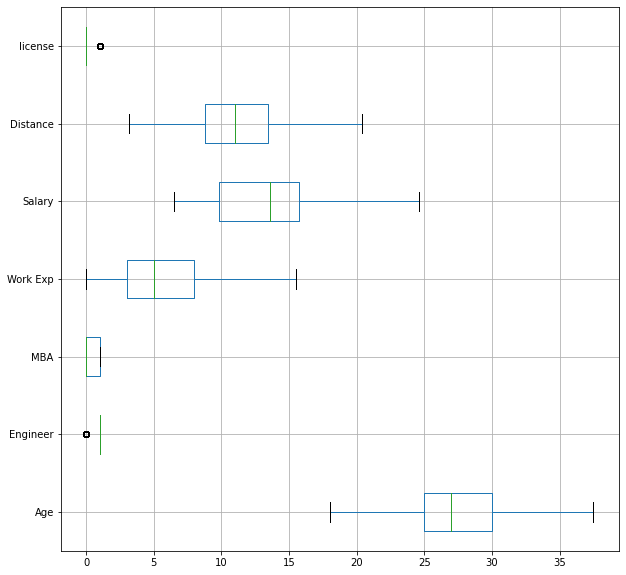

In [27]:
plt.figure(figsize=(10,10))
cars[num].boxplot(vert=0)

### Question 1.2:  Split the data into train and test in the ratio 70:30. Is scaling necessary or not?

In [ ]:
# Scaling 


In [28]:
cars =pd.get_dummies(cars, columns=cat,drop_first=True)

In [29]:
#Scaling the variables as continuous variables have different weightage using min-max technique
cars[num] = cars[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [31]:
cars.head()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Gender_Male,Transport_Public Transport
0,0.512821,0.0,0.0,0.258065,0.430642,0.000000,0.0,1,1
1,0.256410,1.0,0.0,0.258065,0.099379,0.005827,0.0,0,1
2,0.564103,1.0,0.0,0.451613,0.380952,0.052440,0.0,1,1
3,0.512821,1.0,1.0,0.322581,0.380952,0.075747,0.0,0,1
4,0.461538,1.0,0.0,0.258065,0.380952,0.081573,0.0,1,1


In [32]:
X = cars.drop('Transport_Public Transport',axis=1)
y = cars['Transport_Public Transport']

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Question 1.3: Build the following models on the 70% training data and check the performance of these models on the Training as well as the 30% Test data using the various inferences from the Confusion Matrix and plotting a AUC-ROC curve along with the AUC values. Tune the models wherever required for optimum performance.:
**a. Logistic Regression Model**

**b. Linear Discriminant Analysis**

**c. Decision Tree Classifier – CART model**

**d. Naïve Bayes Model**

**e. KNN Model**

**f. Random Forest Model**

**g. Boosting Classifier Model using Gradient boost.**

In [36]:
#Logistic Regression Model
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [37]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [38]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.727056,0.272944
1,0.049350,0.950650
2,0.522415,0.477585
3,0.033538,0.966462
4,0.754668,0.245332


In [39]:
# Confusion matrix and ROC curve on train data for Logistic Regression

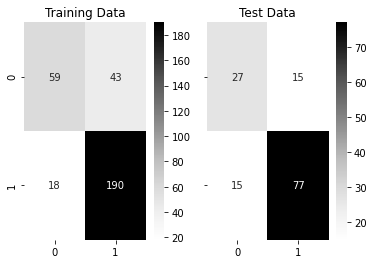

In [52]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.836


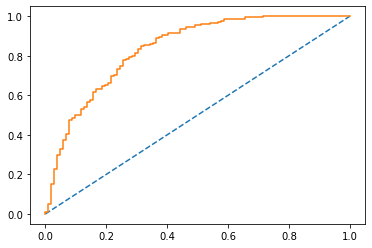

In [43]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [46]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66       102
           1       0.82      0.91      0.86       208

    accuracy                           0.80       310
   macro avg       0.79      0.75      0.76       310
weighted avg       0.80      0.80      0.80       310



In [ ]:
# Confusion matrix and ROC curve on test data for Logistic Regression

AUC: 0.836


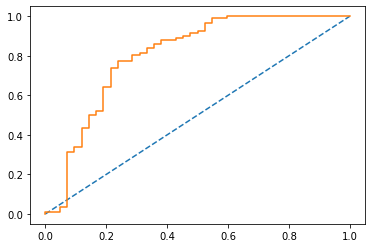

In [47]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [48]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        42
           1       0.84      0.84      0.84        92

    accuracy                           0.78       134
   macro avg       0.74      0.74      0.74       134
weighted avg       0.78      0.78      0.78       134



In [ ]:
# LDA Model

In [49]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [50]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

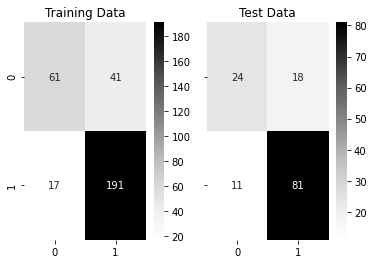

In [53]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [55]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       102
           1       0.82      0.92      0.87       208

    accuracy                           0.81       310
   macro avg       0.80      0.76      0.77       310
weighted avg       0.81      0.81      0.81       310



In [54]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62        42
           1       0.82      0.88      0.85        92

    accuracy                           0.78       134
   macro avg       0.75      0.73      0.74       134
weighted avg       0.78      0.78      0.78       134



In [ ]:
# ROC & AUC on Training data for LDA Model

In [58]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.833


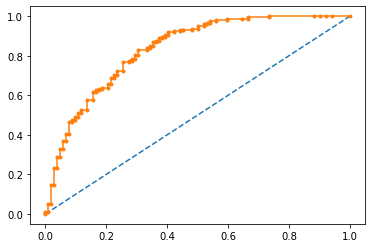

In [59]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.show()

AUC for the Test Data: 0.802


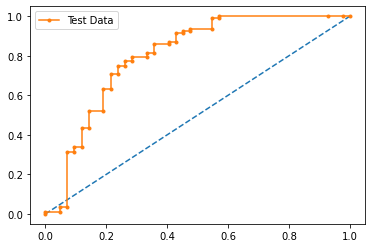

In [61]:
# AUC and ROC on the test data for LDA Model

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
#Decision Tree Classifier – CART model

In [63]:
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
ytrain_predict = DT_model.predict(X_train)
ytest_predict = DT_model.predict(X_test)
ytest_predict_prob=DT_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


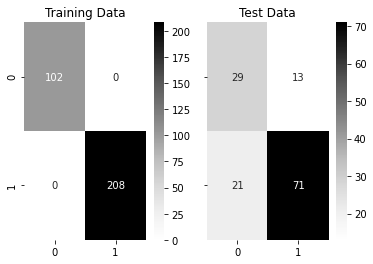

In [65]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [67]:
print('Classification Report on Training Data for CART Model')
print(classification_report(y_train, ytrain_predict))
print('Classification Report on Testing Data for CART Model')
print(classification_report(y_test, ytest_predict))

Classification Report on Training Data for CART Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Classification Report on Testing Data for CART Model
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        42
           1       0.85      0.77      0.81        92

    accuracy                           0.75       134
   macro avg       0.71      0.73      0.72       134
weighted avg       0.76      0.75      0.75       134



AUC: 1.000


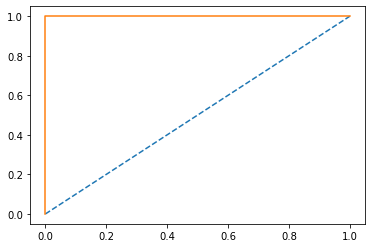

In [69]:
#ROC curve on Train data for CART Model

# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


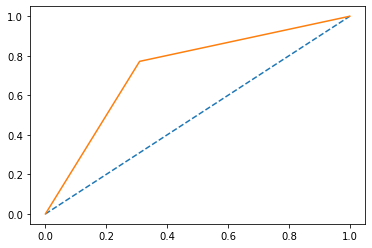

In [70]:
#ROC curve on test data for CART Model


# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
# Naïve Bayes Model

In [71]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [72]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)
ytest_predict_prob=NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.061270,0.938730
1,0.004887,0.995113
2,0.999835,0.000165
3,0.006266,0.993734
4,0.995149,0.004851


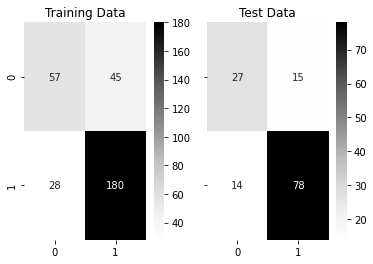

In [73]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [74]:
print('Classification Report on Training Data for Naive Bayes Model')
print(classification_report(y_train, ytrain_predict))
print('Classification Report on Testing Data for Naive Bayes Model')
print(classification_report(y_test, ytest_predict))

Classification Report on Training Data for Naive Bayes Model
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       102
           1       0.80      0.87      0.83       208

    accuracy                           0.76       310
   macro avg       0.74      0.71      0.72       310
weighted avg       0.76      0.76      0.76       310

Classification Report on Testing Data for Naive Bayes Model
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        42
           1       0.84      0.85      0.84        92

    accuracy                           0.78       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.78      0.78      0.78       134



AUC: 0.791


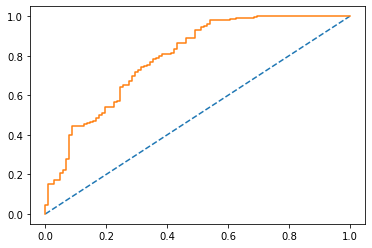

In [75]:
#ROC curve on Train data for Naive Bayes

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.791


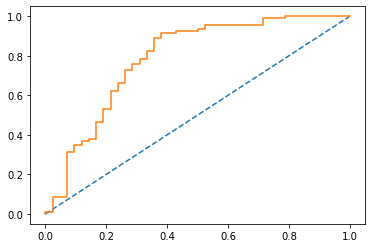

In [76]:
#ROC curve on test data for Naive Bayes


# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [ ]:
# KNN Model

In [77]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)
ytest_predict_prob=KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.4,0.6
3,0.2,0.8
4,0.8,0.2


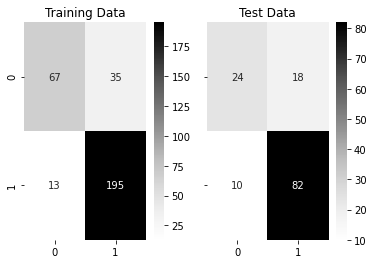

In [79]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [80]:
print('Classification Report on Training Data for KNN Model')
print(classification_report(y_train, ytrain_predict))
print('Classification Report on Testing Data for KNN Model')
print(classification_report(y_test, ytest_predict))

Classification Report on Training Data for KNN Model
              precision    recall  f1-score   support

           0       0.84      0.66      0.74       102
           1       0.85      0.94      0.89       208

    accuracy                           0.85       310
   macro avg       0.84      0.80      0.81       310
weighted avg       0.84      0.85      0.84       310

Classification Report on Testing Data for KNN Model
              precision    recall  f1-score   support

           0       0.71      0.57      0.63        42
           1       0.82      0.89      0.85        92

    accuracy                           0.79       134
   macro avg       0.76      0.73      0.74       134
weighted avg       0.78      0.79      0.78       134



AUC: 0.922


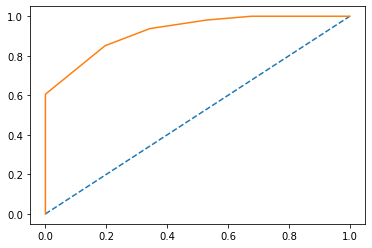

In [81]:
#ROC curve on Train data for KNN Model

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.922


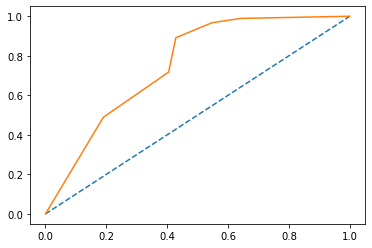

In [82]:
#ROC curve on test data for KNN Model


# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
# Random Forest Model

In [117]:
RF_model=RandomForestClassifier(n_estimators=1001,max_depth=10, max_features=6, min_samples_leaf=50,min_samples_split=150, random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=1001,
                       random_state=1)

In [118]:
ytrain_predict = RF_model.predict(X_train)
ytest_predict = RF_model.predict(X_test)
ytest_predict_prob=RF_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.305543,0.694457
1,0.202287,0.797713
2,0.400702,0.599298
3,0.210286,0.789714
4,0.447347,0.552653


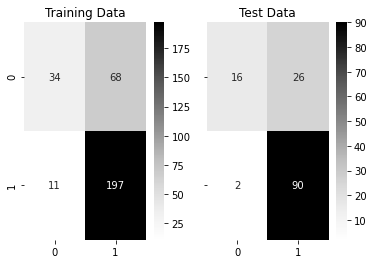

In [119]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [120]:
print('Classification Report on Training Data for Random Forest Model')
print(classification_report(y_train, ytrain_predict))
print('Classification Report on Testing Data for Random Forest Model')
print(classification_report(y_test, ytest_predict))

Classification Report on Training Data for Random Forest Model
              precision    recall  f1-score   support

           0       0.76      0.33      0.46       102
           1       0.74      0.95      0.83       208

    accuracy                           0.75       310
   macro avg       0.75      0.64      0.65       310
weighted avg       0.75      0.75      0.71       310

Classification Report on Testing Data for Random Forest Model
              precision    recall  f1-score   support

           0       0.89      0.38      0.53        42
           1       0.78      0.98      0.87        92

    accuracy                           0.79       134
   macro avg       0.83      0.68      0.70       134
weighted avg       0.81      0.79      0.76       134



AUC: 0.792


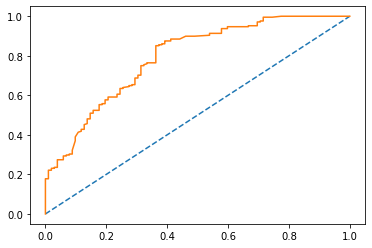

In [121]:
#ROC curve on Train data for Random Forest

# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.792


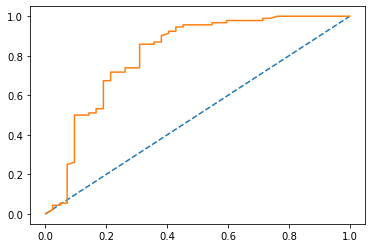

In [122]:
#ROC curve on test data for Random Forest


# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [ ]:
# Boosting Classifier Model using Gradient boost.

In [133]:
GB_model = GradientBoostingClassifier(n_estimators = 50,random_state=1)
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [134]:
ytrain_predict = GB_model.predict(X_train)
ytest_predict = GB_model.predict(X_test)
ytest_predict_prob=GB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.348816,0.651184
1,0.034752,0.965248
2,0.763275,0.236725
3,0.125686,0.874314
4,0.920891,0.079109


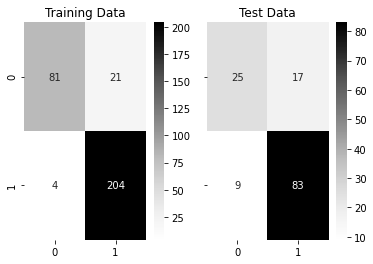

In [135]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [136]:
print('Classification Report on Training Data for Boosting Classifier Model')
print(classification_report(y_train, ytrain_predict))
print('Classification Report on Testing Data for Boosting Classifier Model')
print(classification_report(y_test, ytest_predict))

Classification Report on Training Data for Boosting Classifier Model
              precision    recall  f1-score   support

           0       0.95      0.79      0.87       102
           1       0.91      0.98      0.94       208

    accuracy                           0.92       310
   macro avg       0.93      0.89      0.90       310
weighted avg       0.92      0.92      0.92       310

Classification Report on Testing Data for Boosting Classifier Model
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        42
           1       0.83      0.90      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.75      0.76       134
weighted avg       0.80      0.81      0.80       134



AUC: 0.980


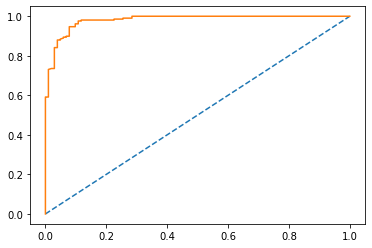

In [137]:
#ROC curve on Train data for Boosting Classifier

# predict probabilities
probs = GB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.980


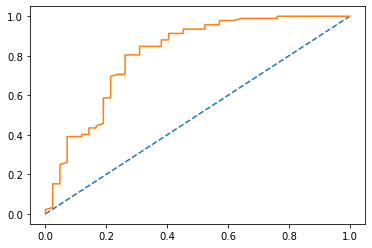

In [138]:
#ROC curve on test data for Boosting Classifier


# predict probabilities
probs = GB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Question 1.4: Which model performs the best?

In [ ]:
# Model Comparison 

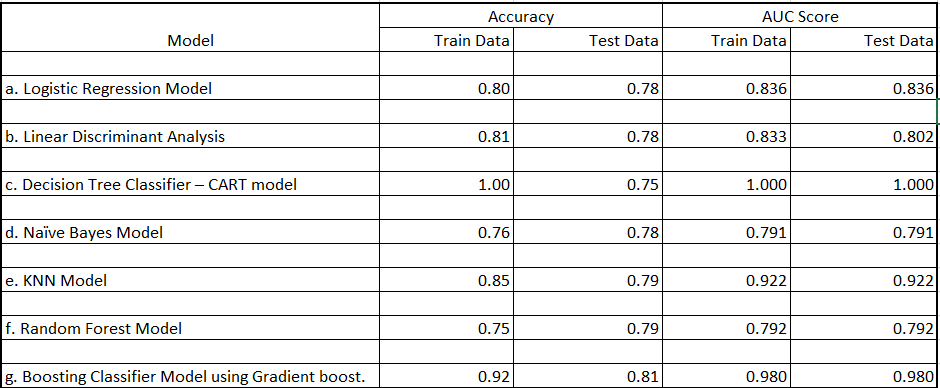

- From the Above Table we can conclude that Boosting Classifier Model using  Gradient Boost is the Best Model. Boosting Classifier Model has an AUC score of 0.98 on both Train and Test data set. Accuracy on train data is nearly 92% and on test data is 81%.
- But The difference in Accuracy between Train data and test Data is more than 10% which could result in poor results. 
- 2nd Best Model is the KNN Model with AUC score of 0.922 on both Train and test data set.
- Accuracy of the KNN Model on Train data is 0.85 and on test Data is 0.79 
- Worst that can be consider in the above scenario is the CART model.

### Question 1.5: What are your business insights?

- Majority of the employees recorded in the data set prefer Public Transport.
- Age, Salary, Distance travelled play a major Role in Mode of Transport. Generally if the Distance between Home and Office is greater than 20 KM, Employees prefer Private Transport.
- A better model can be built if Enterprise provides more Employee records. More the records better the Accuracy and Prediction.
- With the given Dataset and Based on Accuracy of Prediction, Boosting Classifer Model can be equipped to predict what mode of transport ( Public or Private) Employee use.

# Part 2: Text Mining

### A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch to the VC sharks.

You will ONLY use “Description” column for the initial text mining exercise.

In [272]:
import nltk
import random
import string

### Question 2.1 Pick out the Deal (Dependent Variable) and Description columns into a separate data frame.

In [140]:
shark = pd.read_csv('Shark Tank Companies.csv')

In [141]:
shark.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [142]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [145]:
shark.entrepreneurs.fillna("No entrepreneurs mentioned",inplace=True)
shark.website.fillna("No_website_mentioned",inplace=True)

In [146]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           495 non-null    object
 5   location                495 non-null    object
 6   website                 495 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [147]:
shark.isnull().sum().sum()

0

In [161]:
deal_shark = pd.DataFrame()

In [162]:
deal_shark = shark[['deal','description']]

In [170]:
deal_shark

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


### Question 2.2: Create two corpora, one for those who secured a Deal, the other for those who did not secure a deal.

In [226]:
deal_secured = deal_shark[deal_shark['deal']==True]

In [227]:
deal_secured = deal_secured.reset_index(drop = True)
deal_secured

,deal,description
0,True,Retail and wholesale pie factory with two reta...
1,True,Ava the Elephant is a godsend for frazzled par...
2,True,One of the first entrepreneurs to pitch on Sha...
3,True,An educational record label and publishing hou...
4,True,A battery-operated cooking device that siphons...
...,...,...
246,True,SynDaver Labs makes synthetic body parts for u...
247,True,Zoom Interiors is a virtual service for interi...
248,True,Spikeball started out as a casual outdoors gam...
249,True,Shark Wheel is out to literally reinvent the w...


In [187]:
deal_no_secure = deal_shark[deal_shark['deal']==False]

In [188]:
deal_no_secure = deal_no_secure.reset_index(drop = True)
deal_no_secure

,deal,description
0,False,Bluetooth device implant for your ear.
1,False,"Organizing, packing, and moving services deliv..."
2,False,Interactive media centers for healthcare waiti...
3,False,A mixed martial arts clothing line looking to ...
4,False,"Attach Noted is a detachable ""arm"" that holds ..."
...,...,...
239,False,Buck Mason makes high-quality men's clothing i...
240,False,"Frameri answers the question, ""Why aren't your..."
241,False,The Paleo Diet Bar is a nutrition bar that is ...
242,False,Sunscreen Mist adds another point of access fo...


### Question 2.3: The following exercise is to be done for both the corpora: 
**a) Find the number of characters for both the corpuses.**

**b) Remove Stop Words from the corpora. (Words like ‘also’, ‘made’, ‘makes’, ‘like’, ‘this’, ‘even’ and ‘company’ are to be removed)**

**c) What were the top 3 most frequently occurring words in both corpuses (after removing stop words)?**

**d) Plot the Word Cloud for both the corpora.**

In [195]:
# Deal = True Corpus
import nltk
import random
import string

In [228]:
deal_secured['char_count'] = deal_secured['description'].str.len()
deal_secured[['description','char_count']].head()

,description,char_count
0,Retail and wholesale pie factory with two reta...,73
1,Ava the Elephant is a godsend for frazzled par...,244
2,One of the first entrepreneurs to pitch on Sha...,365
3,An educational record label and publishing hou...,122
4,A battery-operated cooking device that siphons...,117


In [270]:
deal_secured['char_count'].sum()

64060

In [229]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["also", "made", "makes", "like", "this", "even" , "company"])

In [230]:
all_words = [x for x in pd.Series(' '.join(deal_secured['description']).split())] 

In [231]:
all_words_clean1 = [word for word in all_words if word not in stopwords]

In [232]:
all_words_clean1[:5]

['Retail', 'wholesale', 'pie', 'factory', 'two']

In [233]:
all_words_freq = nltk.FreqDist(all_words_clean1)

In [234]:
all_words_freq

FreqDist({'The': 79, 'A': 64, 'make': 25, 'This': 20, 'These': 19, 'easy': 18, 'designed': 18, 'You': 18, 'without': 17, 'line': 16, ...})

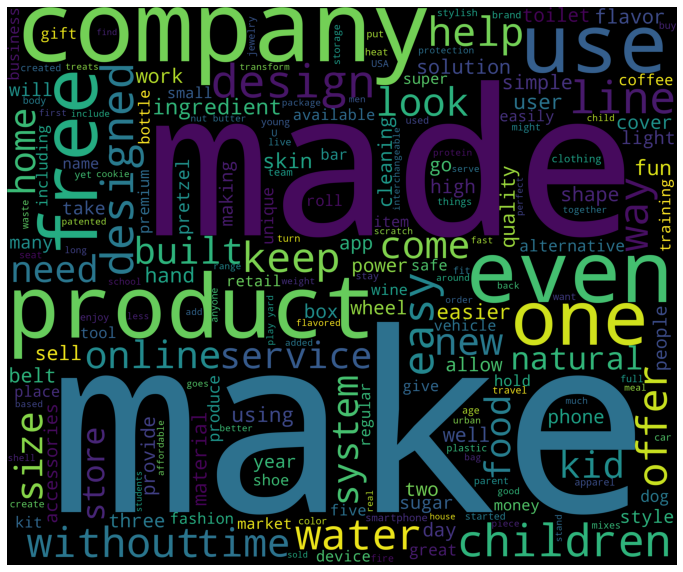

In [251]:
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(deal_secured['description'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Deal = False Corpus

In [252]:
deal_no_secure['char_count'] = deal_no_secure['description'].str.len()
deal_no_secure[['description','char_count']].head()

,description,char_count
0,Bluetooth device implant for your ear.,38
1,"Organizing, packing, and moving services deliv...",68
2,Interactive media centers for healthcare waiti...,112
3,A mixed martial arts clothing line looking to ...,110
4,"Attach Noted is a detachable ""arm"" that holds ...",91


In [271]:
deal_no_secure['char_count'].sum()

47184

In [263]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["also", "made", "makes", "like", "this", "even" , "company"])

In [264]:
all_words1 = [x for x in pd.Series(' '.join(deal_no_secure['description']).split())] 

In [265]:
all_words_clean2 = [word for word in all_words1 if word not in stopwords]

In [266]:
all_words_clean2[:5]

['Bluetooth', 'device', 'implant', 'ear.', 'Organizing,']

In [267]:
all_words_freq2 = nltk.FreqDist(all_words_clean2)

In [268]:
all_words_freq2

FreqDist({'A': 76, 'The': 54, 'An': 19, 'make': 18, 'designed': 14, 'use': 14, 'system': 14, 'water': 14, 'without': 13, 'product': 12, ...})

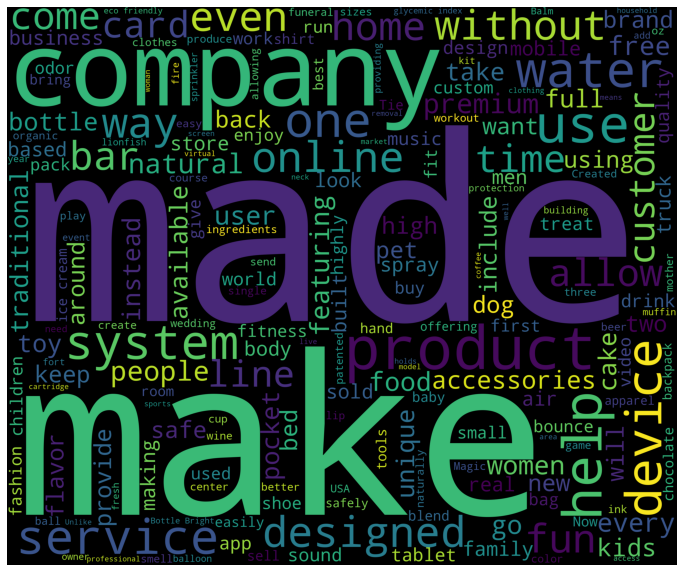

In [269]:
from wordcloud import WordCloud,STOPWORDS

words2 = ' '.join(deal_no_secure['description'])
cleaned_word = " ".join([word for word in words2.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Question 2.4:Refer to both the word clouds. What do you infer?

- From both the Word clouds, we observe that the words like "make, made, Company, Product" are common indicating that those words have repeated multiple times. 
- From Deal Secured Corpus, Words like Online Service, Designed, System, offer, Free, Easy are highlighted which could part of the reason why they could secure deal.
- From Deal Not Secured Corpus, Service, without, people, device, traditional, Food, fitness are highlighted.

### Question 2.5: Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?